In [6]:
import requests
import string
import os
import itertools
import nltk
# this allows you to plot in the notebook
%matplotlib inline

In [7]:
def get_rhymes(end_words, scheme='ababbcbcc'):
    rhymes = []
    a = []
    b = []
    c = []
    for word, rhyme in zip(end_words, scheme):
        if rhyme == 'a':
            a.append(word)
        if rhyme == 'b':
            b.append(word)
        if rhyme == 'c':
            c.append(word)
    for group in [a, b, c]:
        for pair in itertools.combinations(group, 2):
            rhymes.append(pair)
    return rhymes


In [8]:
pairs = []
for filename in os.listdir("texts/spenser/"):
    with open("texts/spenser/" + filename) as f:
        fq = f.read()
        for stanza in fq.split("\n\n"):
            if len(stanza.split("\n")) != 9:
                continue
            end_words = [line.strip(string.punctuation).split()[-1] for line in stanza.split("\n")]
            pairs.extend(get_rhymes(end_words))
            
    

In [9]:
nltk.FreqDist(pairs)

FreqDist({('bee', 'see'): 54, ('see', 'bee'): 46, ('might', 'fight'): 39, ('was', 'pas'): 35, ('found', 'ground'): 34, ('hand', 'land'): 28, ('hart', 'smart'): 28, ('knight', 'might'): 26, ('place', 'grace'): 26, ('way', 'lay'): 26, ...})

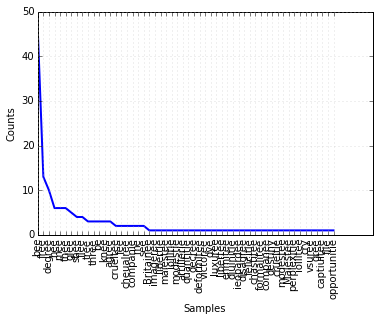

In [13]:
nltk.ConditionalFreqDist(pairs)['see'].plot()